cost after 0 iteration : 0.693147
cost after 10 iteration : 0.671487
cost after 20 iteration : 0.664807
cost after 30 iteration : 0.658434
cost after 40 iteration : 0.652346
cost after 50 iteration : 0.646521
cost after 60 iteration : 0.640940
cost after 70 iteration : 0.635585
cost after 80 iteration : 0.630439
cost after 90 iteration : 0.625489
cost after 100 iteration : 0.620721
cost after 110 iteration : 0.616123
cost after 120 iteration : 0.611684
cost after 130 iteration : 0.607394
cost after 140 iteration : 0.603243
cost after 150 iteration : 0.599223
cost after 160 iteration : 0.595328
cost after 170 iteration : 0.591549
cost after 180 iteration : 0.587880
cost after 190 iteration : 0.584316
cost after 200 iteration : 0.580850
cost after 210 iteration : 0.577478
cost after 220 iteration : 0.574196
cost after 230 iteration : 0.570998
cost after 240 iteration : 0.567881
cost after 250 iteration : 0.564841
cost after 260 iteration : 0.561875
cost after 270 iteration : 0.558979
cos

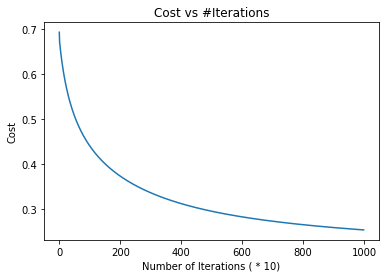

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split



def init():
    
    df=pd.read_csv("data.csv")
    
    
    #Dropping the 'id' column from the dataset
    df=df.drop("id",1)
    df=df.drop("Unnamed: 32",1)
    
    #Mapping M to 1 and B to 0 in the output Label DataFrame
    df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
    
    
    #Split Data into training and test (70% and 30%)
    train, test = train_test_split(df, test_size = 0.3, random_state=1)
        
    
    #Training Data
    train_x=train.loc[:,'radius_mean' : 'fractal_dimension_worst']
    train_y=train.loc[:,['diagnosis']]
    
    #Testing Data
    test_x=test.loc[:,'radius_mean' : 'fractal_dimension_worst']
    test_y=test.loc[:,['diagnosis']]
    
    #Converting Traing and Test Data to numpy array
    train_x=np.asarray(train_x)
    train_y=np.asarray(train_y)
    test_x=np.asarray(test_x)
    test_y=np.asarray(test_y)
    
    #Calling the model function to train a Logistic Regression Model on Training Data
    d= model(train_x.T, train_y.T, num_of_iterations=10000, alpha=0.000001)
    
        
    costs=d["costs"]
    w=d["w"]
    b=d["b"]
    
    #Drawing the plot between cost and number of iterations
    plt.plot(costs)
    plt.title("Cost vs #Iterations")
    plt.xlabel("Number of Iterations ( * 10)")
    plt.ylabel("Cost")
    
    
    #Now, calculating the accuracy on Training and Test Data
    Y_prediction_train = predict(train_x.T, w, b)
    Y_prediction_test = predict(test_x.T, w, b)
    
    
    
    print("\nTrain accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_y.T)) * 100))
    
    print("\nTest accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_y.T)) * 100))
    
    
    
    

#Function to initialize the weights and bias
def initialize(m):
    
    w = np.zeros((m,1))
    b = 0
    
    return w , b
    
#Function to calculate sigmoid of x    
def sigmoid(X):
    return 1/(1 + np.exp(- X))    


#Function for doing forward and back propogation
def propogate(X, Y, w, b):
    
    m = X.shape[1] #Number of training examples

    #Forward Propogation, calculating the cost
    Z = np.dot(w.T, X) + b;    
    A = sigmoid(Z)
    cost= -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    #Back Propogation , calculating the gradients
    dw = (1/m)* np.dot(X, (A-Y).T)
    db = (1/m)* np.sum(A-Y)
    
    grads= {"dw" : dw, "db" : db}
    
    return grads, cost
    
    


#Function for performing Grdient Descent
def optimize(X, Y, w, b, num_of_iterations, alpha):
    
    costs=[] 
    
    for i in range(num_of_iterations):
 
        grads, cost = propogate(X, Y, w, b)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - alpha * dw
        b = b - alpha * db
        
        #Storing tthe cost at interval of every 10 iterations
        if i% 10 == 0:
            costs.append(cost)
            print("cost after %i iteration : %f" % (i, cost))
            
            
    parameters = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    
    
    return parameters, grads, costs


#Function for doing the predictions on the data set (mapping probabilities to 0 or 1)
def predict(X, w, b):
    
    m = X.shape[1] #Number of training examples
    
    y_prediction =  np.zeros((1,m))
    
    w = w.reshape(X.shape[0], 1)
    
    A=sigmoid(np.dot(w.T, X)+b)
    
    
    for i in range(A.shape[1]):
        
        if(A[0,i]<0.5):
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
            
    
    return y_prediction


#Function for calculating the Logistic Regression Model
def model(Xtrain, Ytrain, num_of_iterations, alpha):
    
    dim = Xtrain.shape[0] #Number of features
    
    w,b = initialize(dim)
    
    parameters, grads, costs = optimize(Xtrain, Ytrain, w, b, num_of_iterations, alpha) 
    
    w = parameters["w"]
    b = parameters["b"]
        
    
    d={"w":w, "b":b, "costs": costs}
    
    return d
    


#Calling the init function to start the program
init()




# New Section

# New Section